In [88]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
wine=datasets.load_wine()
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                 columns= wine['feature_names'] +['target'])
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

<Figure size 1080x504 with 0 Axes>

Accur on training set: 0.895
Accur on test set: 0.844


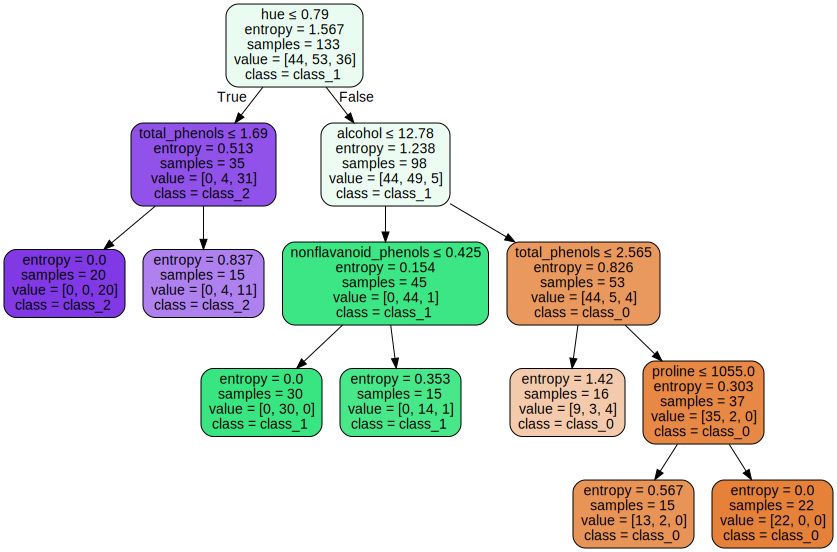

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='entropy', 
                             min_samples_split = 20, 
                             min_samples_leaf = 15, 
                             max_features="sqrt", 
                             max_leaf_nodes=12, 
                             random_state=0)
dtree.fit(X_train, y_train)

print("Accur on training set: {:,.3f}".format(dtree.score(X_train, y_train)))
print("Accur on test set: {:,.3f}".format(dtree.score(X_test, y_test)))

from sklearn.tree import export_graphviz
export_graphviz(dtree, out_file="tree.dot",
               feature_names=data.feature_names,
               class_names=data.target_names,
               filled=True, rounded=True,
               special_characters=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


Accuracy on train: 0.992
Accuracy on test: 0.978


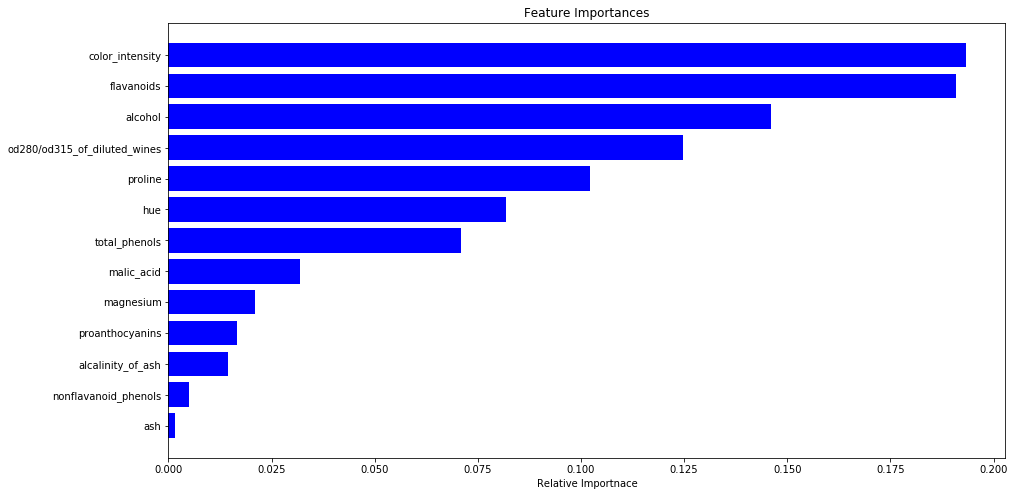

In [66]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(15,8))

from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=50,
                             criterion='entropy',
                             min_samples_split = 20,
                             min_samples_leaf = 15,
                             max_features="sqrt",
                             max_leaf_nodes=12,
                             random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on train: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(forest.score(X_test, y_test)))

import numpy as np
import matplotlib.pyplot as plt
importances = forest.feature_importances_

features = data['feature_names']
indicies = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indicies)), importances[indicies], color='b', align='center')
plt.yticks(range(len(indicies)), [features[i] for i in indicies])
plt.xlabel('Relative Importnace')
plt.show()

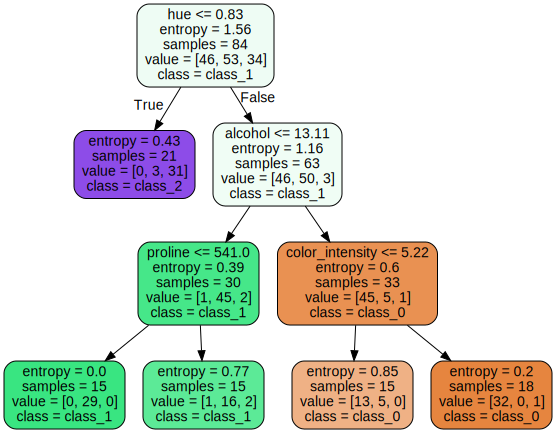

In [67]:
estimator = forest.estimators_[29]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='rftree.dot',
               feature_names = data.feature_names,
               class_names = data.target_names,
               rounded = True, proportion = False,
               precision = 2, filled = True)

import graphviz
with open("rftree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

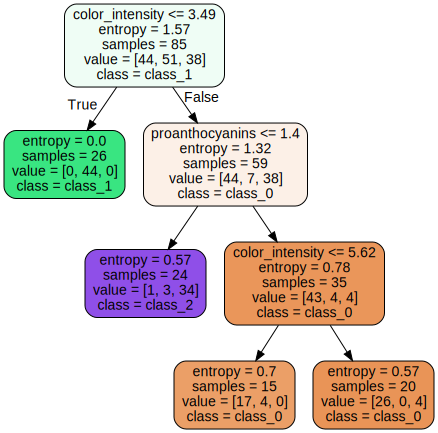

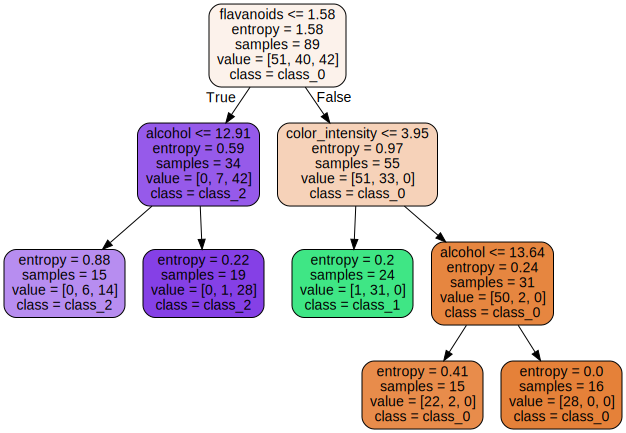

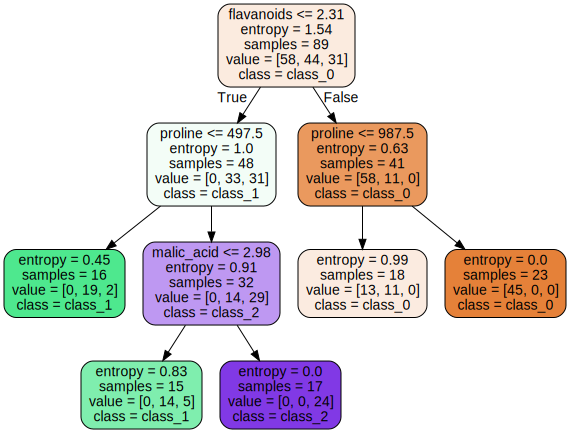

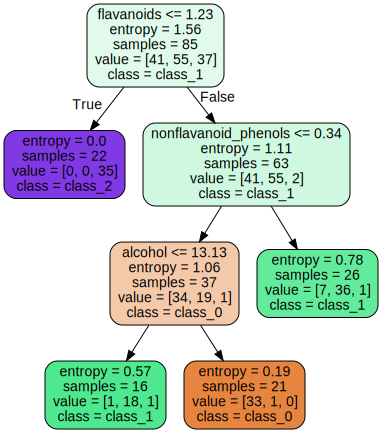

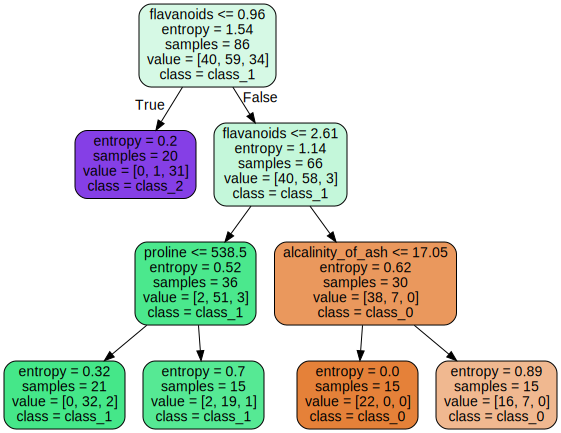

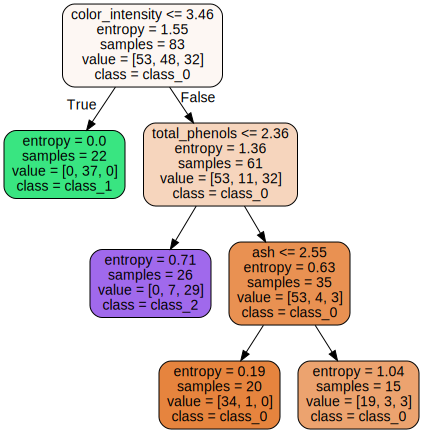

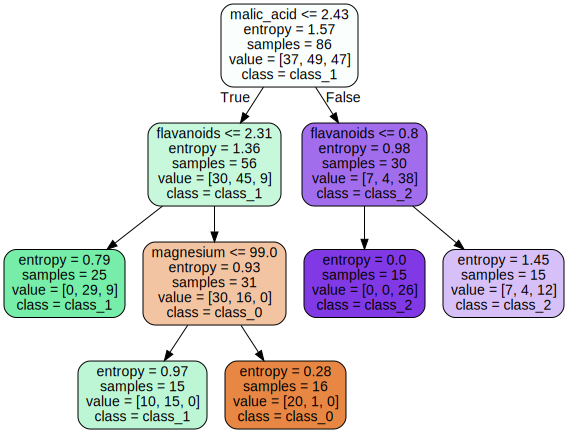

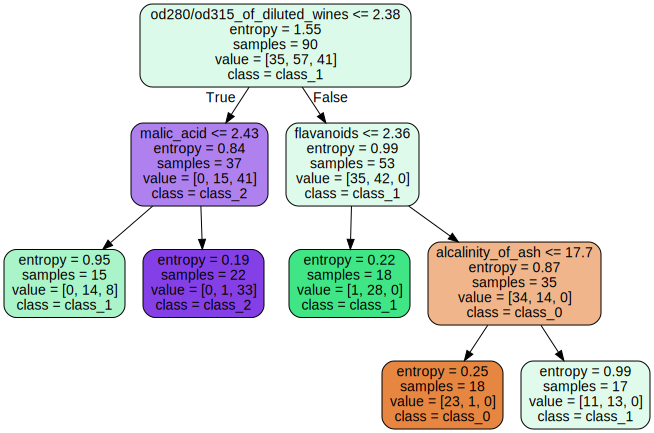

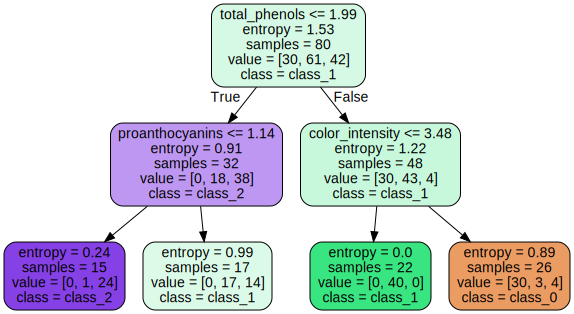

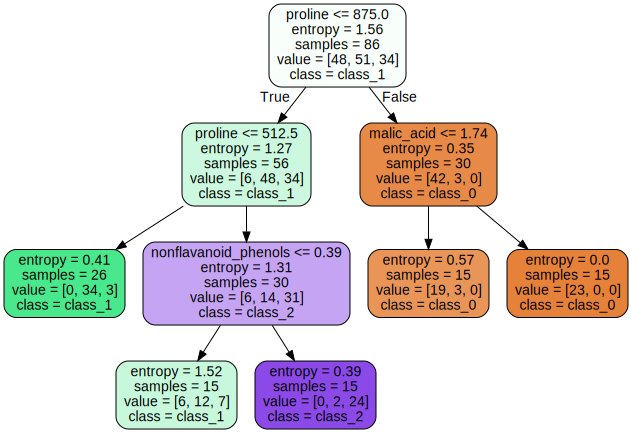

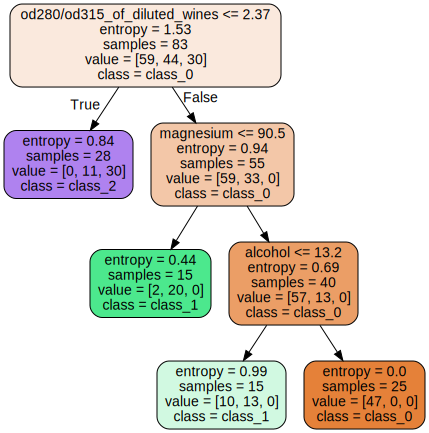

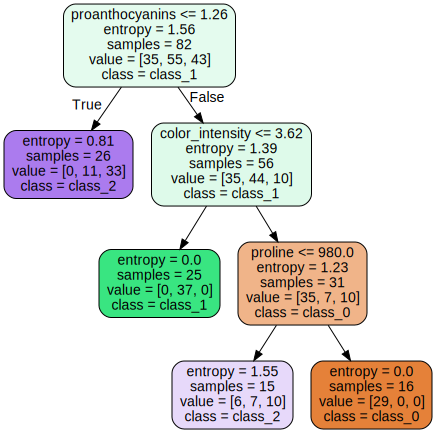

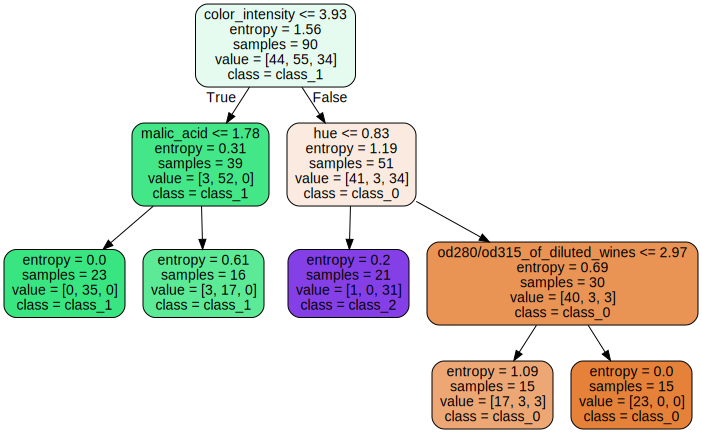

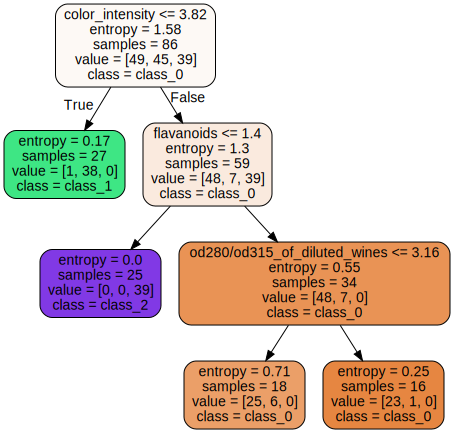

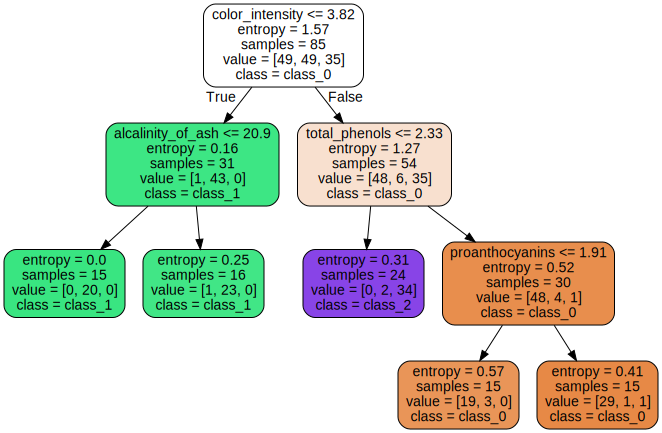

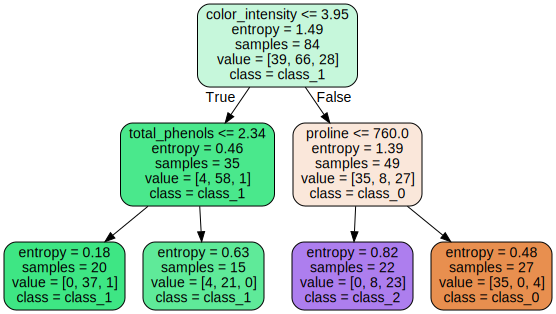

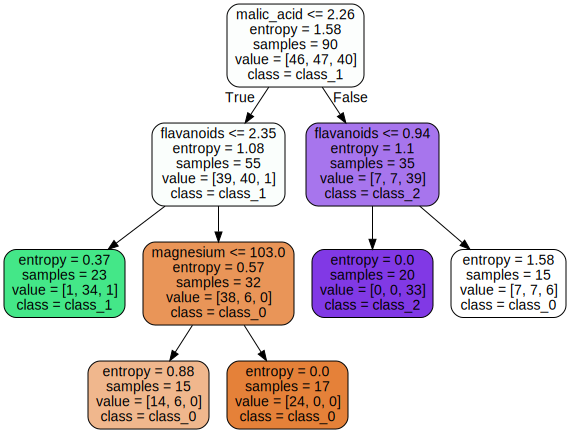

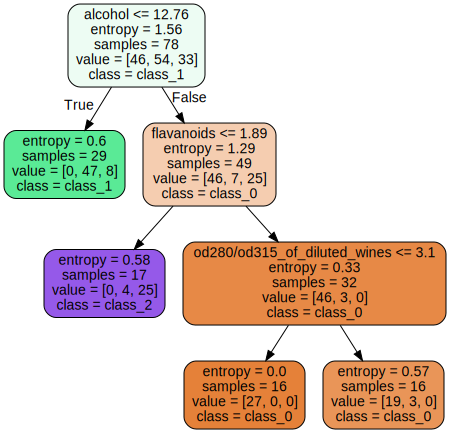

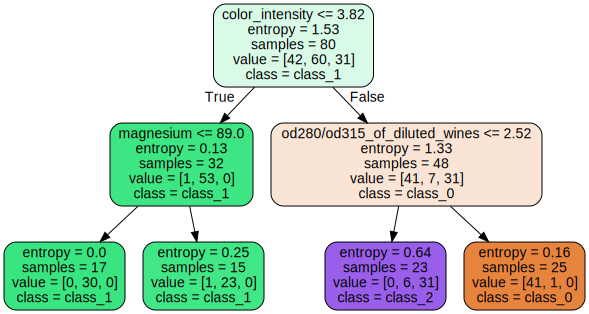

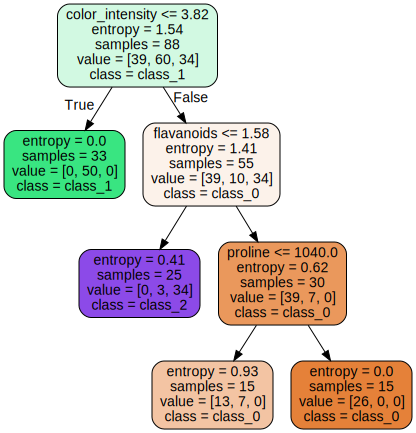

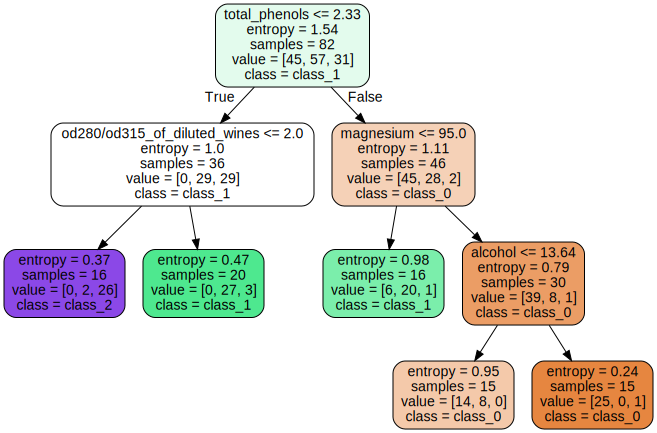

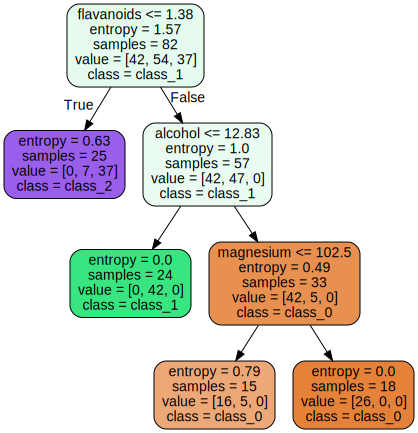

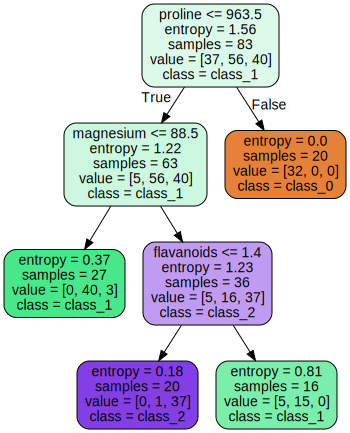

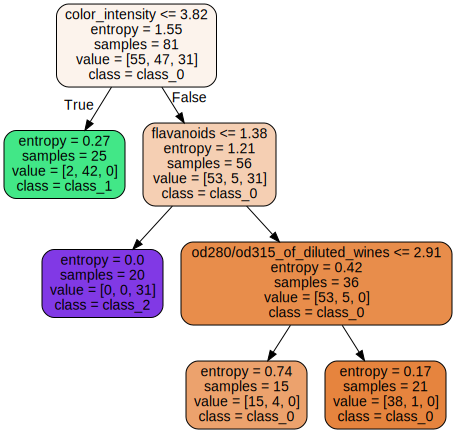

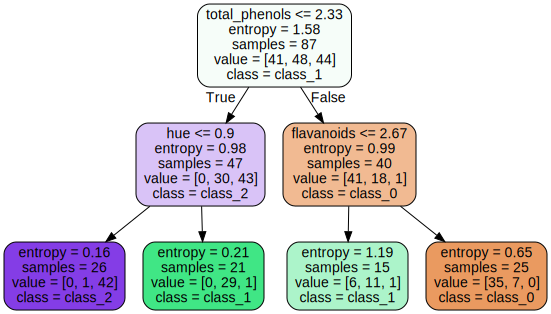

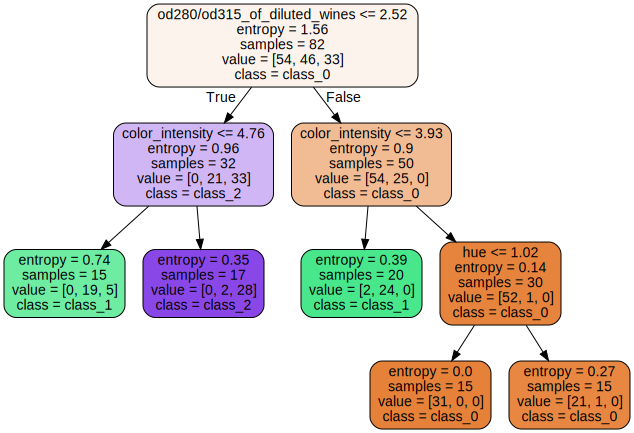

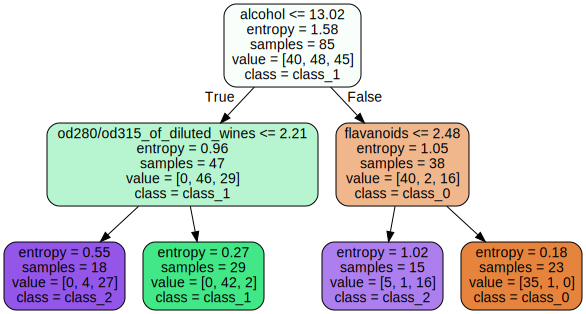

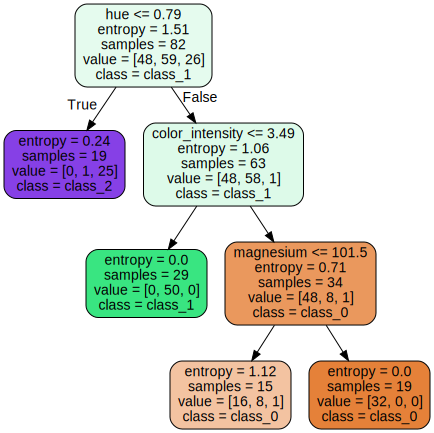

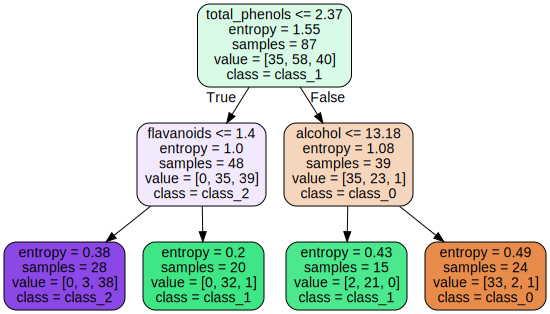

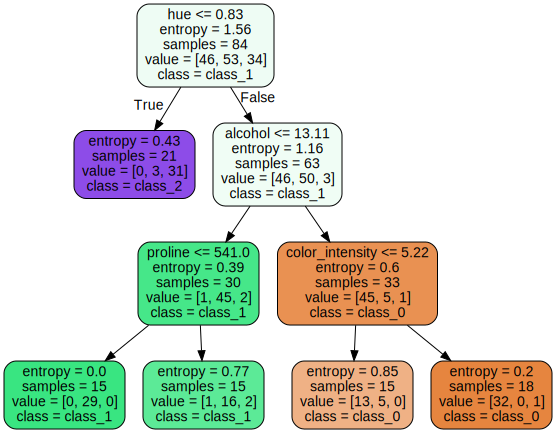

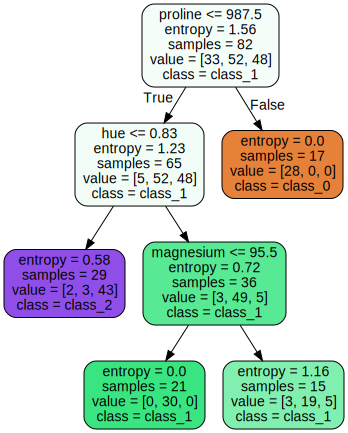

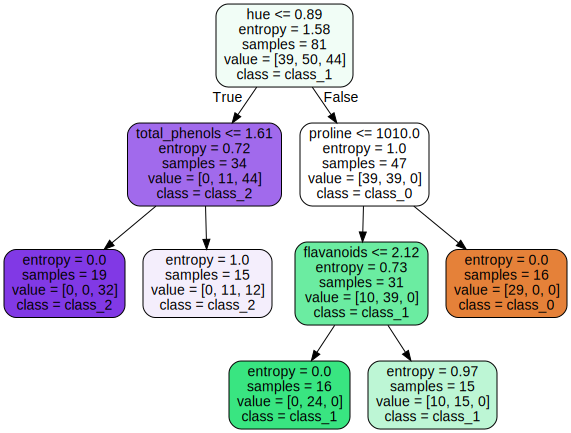

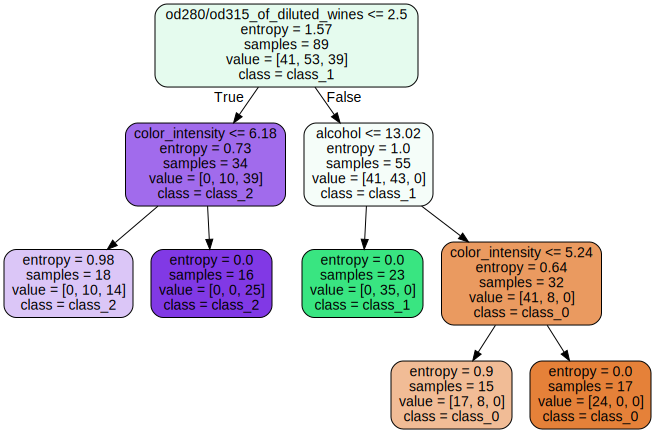

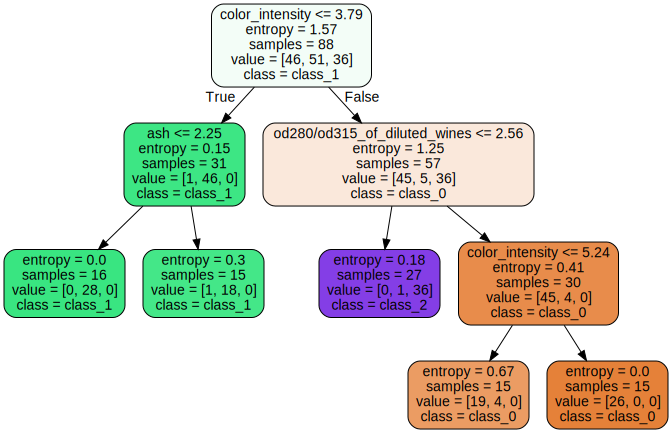

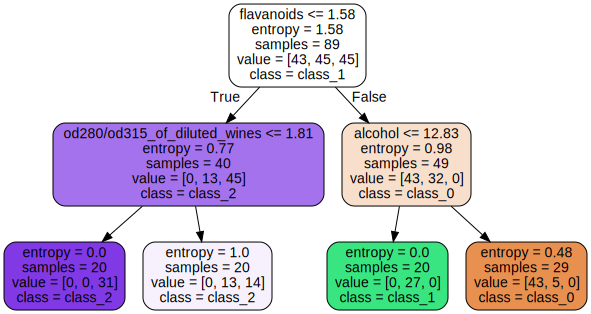

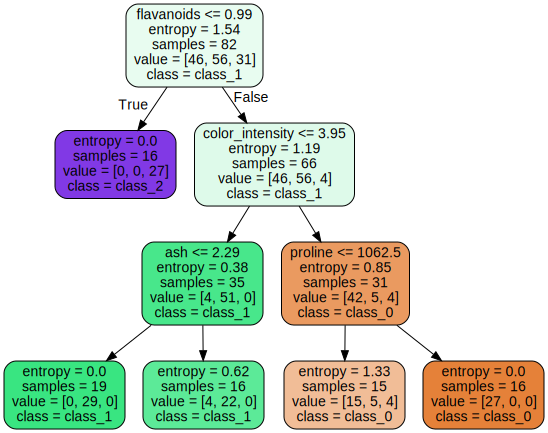

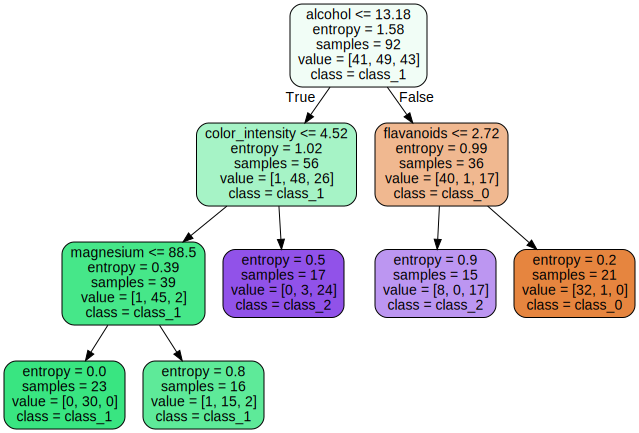

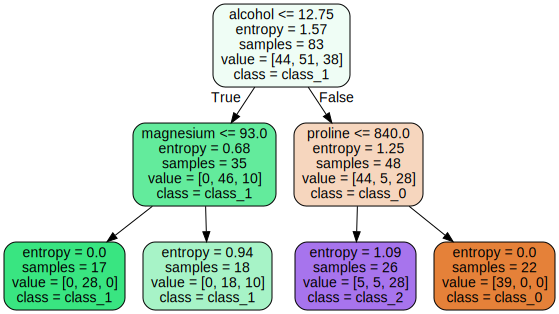

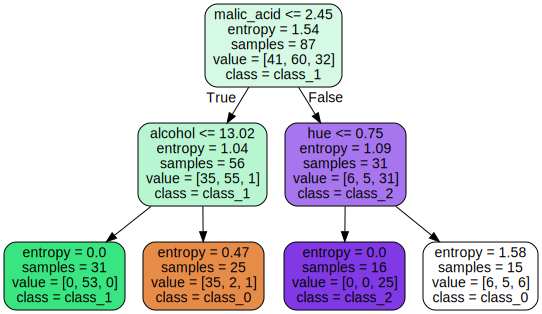

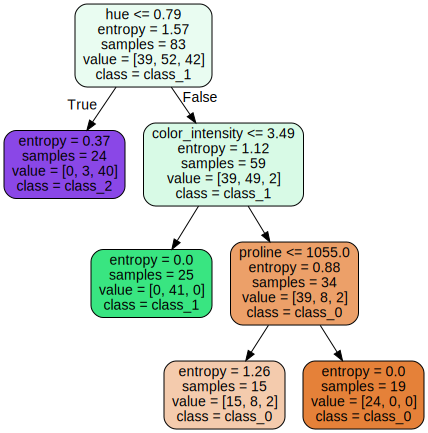

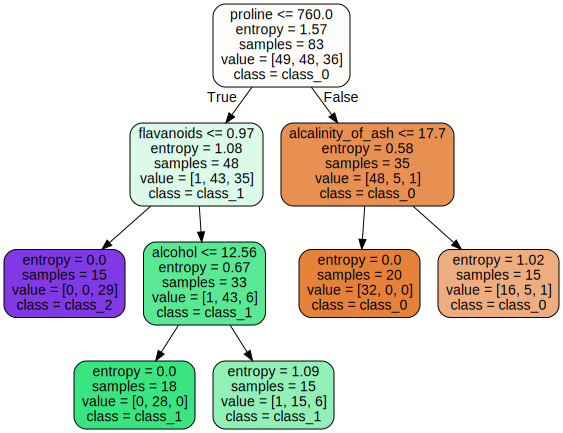

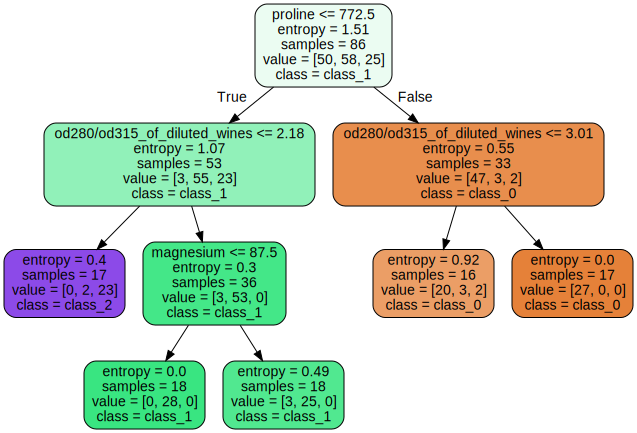

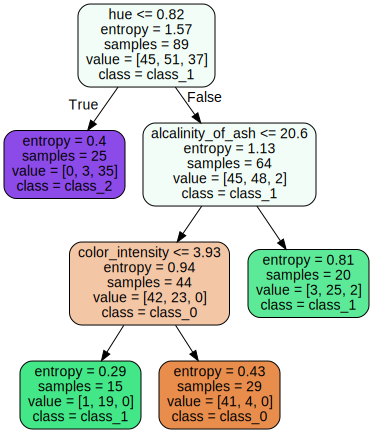

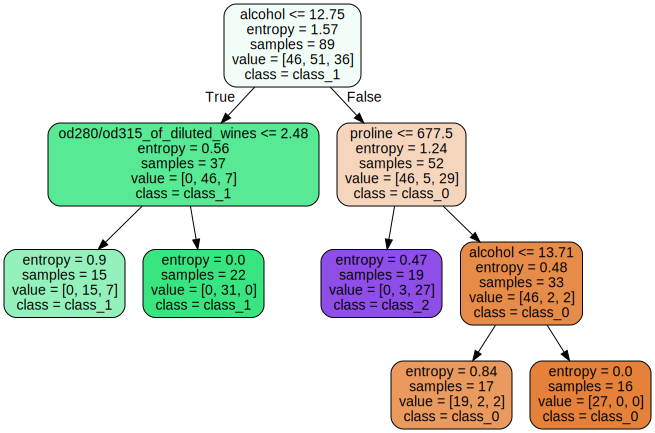

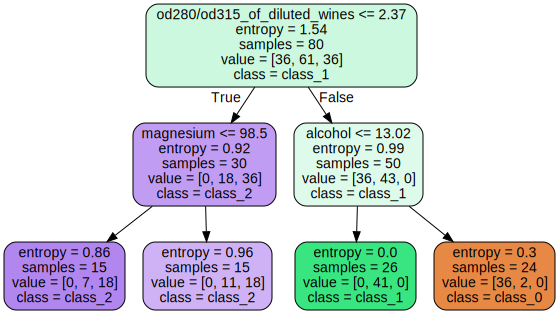

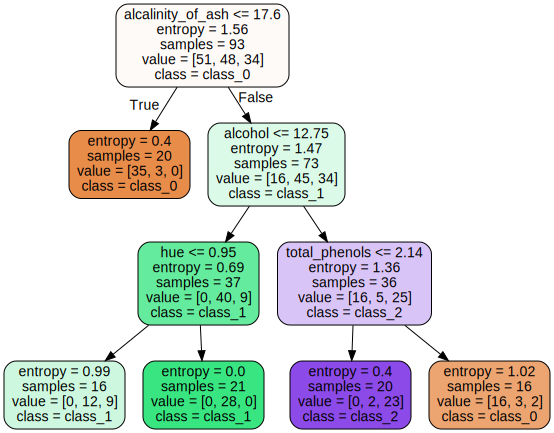

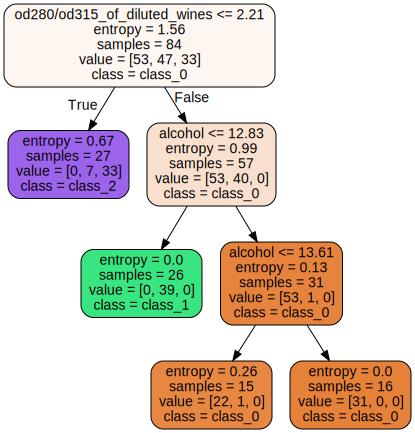

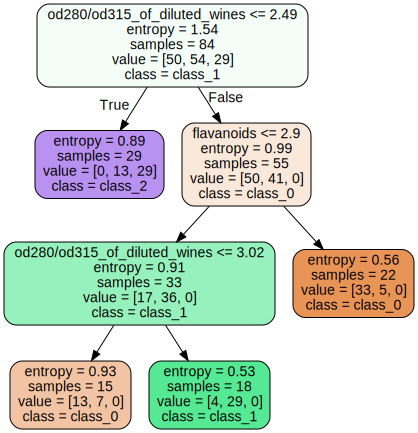

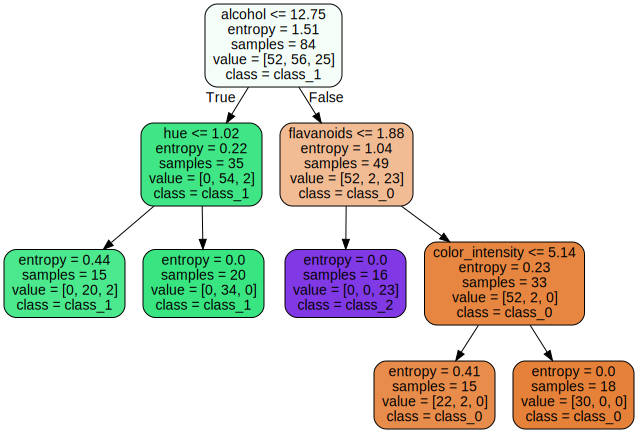

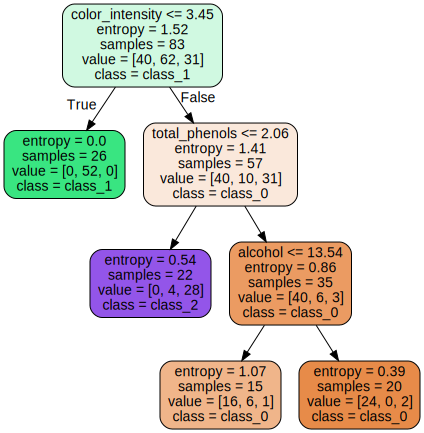

In [68]:
for i in range(50):
    estimator = forest.estimators_[i]

    from sklearn.tree import export_graphviz

    export_graphviz(estimator, out_file='rftree.dot',
               feature_names = data.feature_names,
               class_names = data.target_names,
               rounded = True, proportion = False,
               precision = 2, filled = True)

    import graphviz
    with open("rftree.dot") as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import svm
svc=svm.SVC()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [69]:
clf =svm.SVC(kernel='rbf')
scoresRBF =cross_val_score(clf, data.data, data.target, cv=5)
scoresRBF

array([0.37837838, 0.41666667, 0.44444444, 0.42857143, 0.47058824])

In [70]:
print('mean accuracy: ', scoresRBF.mean(), ', stdDev: ', scoresRBF.std())

mean accuracy:  0.42772983067100717 , stdDev:  0.03057740632767265


In [71]:
clf =svm.SVC(kernel='linear')
scoresLIN =cross_val_score(clf, data.data, data.target, cv=5)
scoresLIN

array([0.86486486, 0.97222222, 0.97222222, 1.        , 1.        ])

In [72]:
print('mean accuracy: ', scoresLIN.mean(), ', stdDev: ', scoresLIN.std())

mean accuracy:  0.961861861861862 , stdDev:  0.05006421221055196


In [73]:
clf =svm.SVC(kernel='poly')
scoresPLY =cross_val_score(clf, data.data, data.target, cv=5)
scoresPLY

array([0.94594595, 0.88888889, 0.97222222, 1.        , 1.        ])

In [74]:
print('mean accuracy: ', scoresPLY.mean(), ', stdDev: ', scoresPLY.std())

mean accuracy:  0.9614114114114114 , stdDev:  0.04145775889745885


In [75]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3)
scores2 =cross_val_score(clf, data.data, data.target, cv=rkf)
scores2

array([1.        , 0.94444444, 0.94444444, 0.94285714, 0.94285714,
       0.97222222, 0.91666667, 1.        , 0.94285714, 1.        ,
       0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])

In [77]:
print('mean accuracy: ', scores2.mean(), ', stdDev: ', scores2.std())

mean accuracy:  0.9606349206349205 , stdDev:  0.02470077925578021


In [129]:
data.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null float64
dtypes: float64(14)
memory usage: 19.5 KB


In [131]:
x = data.iloc[:, 0:13].values
y = data.iloc[:, 13].values

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

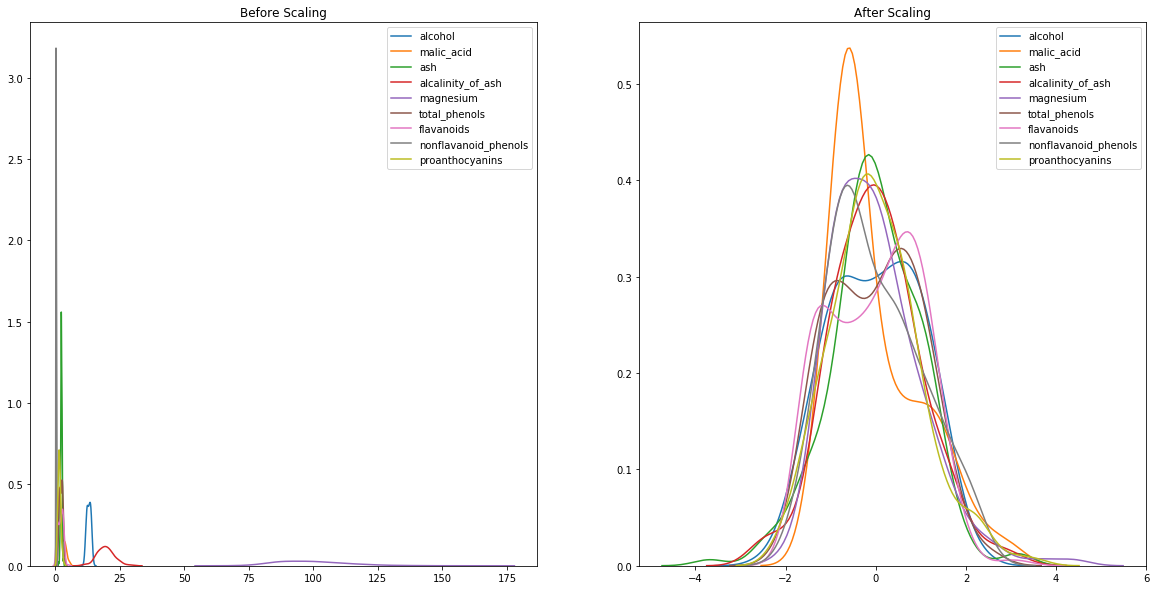

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(data)
s_scaled_df = pd.DataFrame(scaled_df, columns=['alcohol', 'malic_acid','ash','alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'target'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

ax1.set_title("Before Scaling")
sns.kdeplot(df['alcohol'], ax=ax1)
sns.kdeplot(df['malic_acid'], ax=ax1)
sns.kdeplot(df['ash'], ax=ax1)
sns.kdeplot(df['alcalinity_of_ash'], ax=ax1)
sns.kdeplot(df['magnesium'], ax=ax1)
sns.kdeplot(df['total_phenols'],ax=ax1)
sns.kdeplot(df['flavanoids'], ax=ax1)
sns.kdeplot(df['nonflavanoid_phenols'], ax=ax1)
sns.kdeplot(df['proanthocyanins'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(s_scaled_df['alcohol'], ax=ax2)
sns.kdeplot(s_scaled_df['malic_acid'], ax=ax2)
sns.kdeplot(s_scaled_df['ash'], ax=ax2)
sns.kdeplot(s_scaled_df['alcalinity_of_ash'], ax=ax2)
sns.kdeplot(s_scaled_df['magnesium'], ax=ax2)
sns.kdeplot(s_scaled_df['total_phenols'],ax=ax2)
sns.kdeplot(s_scaled_df['flavanoids'], ax=ax2)
sns.kdeplot(s_scaled_df['nonflavanoid_phenols'], ax=ax2)
sns.kdeplot(s_scaled_df['proanthocyanins'], ax=ax2)
plt.show()

In [141]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [142]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)


In [143]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)


In [144]:
print(all_accuracies.mean())
print(all_accuracies.std())


0.9862068965517242
0.01689303270884948


In [155]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [156]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [157]:
gd_sr.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 300, 500, 800, 1000], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [158]:
best_parameters = gd_sr.best_params_
print(best_parameters)


{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}


In [159]:
best_result = gd_sr.best_score_
print(best_result)


0.9859154929577465
